# ***Synthetic Data***
 
this file contains 3 Classification & 3 Clustring methods based on the Synthetic Data, the steps are as follows

1. Importing (calling) libraries and methods
2. Initilizing Functions
3. Creating & Loading Dataset
4. Spiliting Data
5. Classification 
    * K Nearest Neighbors
    * SVM: Support Vector Machine
    * NN: Nureal Network
6. Clustring
    * Heretical Clustering 
    * KMeans
    * DBSCAN






# **1.Importing (calling) libraries and methods** 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Clasification Libraries
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import classification_report, confusion_matrix
# Clustring Libraries
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In Python, you can turn off user warnings by using the warnings module and setting the appropriate warning filter. To disable all user warnings, you can use the following code:
```python
import warnings

warnings.filterwarnings('ignore', category=UserWarning)
```
This code imports the warnings module and sets a filter to ignore any warnings of the UserWarning category. Keep in mind that ignoring all user warnings might hide important information, so it's generally better to address the underlying issues that cause the warnings instead of suppressing them entirely.

In [2]:
#'''
import warnings
warnings.filterwarnings('ignore', category=UserWarning)
#'''

# **2.Initilizing Functions**

* ## Show function:

    The function is to demonstrate the graphs using matplotlib, it first sets the x-axis and y-axis labels to "x1" and "x2". It then sets the title of the plot to the value of the title argument. Finally, it creates the scatter plot using the `plt.scatter()` function, passing in the first and second columns of X as the x and y coordinates, respectively. The c parameter is set to the label argument, which colors each data point according to its label. The s parameter sets the size of the data points.


* ## accuracy function:

    The function calculates the accuracy of the classifier using the score method of the classification_method object. The score method returns the mean accuracy of the classifier on the test dataset. Next, the function calculates the confusion matrix and classification report using the confusion_matrix and classification_report functions from the sklearn metrics module. The confusion matrix is a table that shows the number of true positive, true negative, false positive, and false negative predictions made by the classifier. The classification report shows the precision, recall, and F1-score for each class in the dataset is to gives the user feedback on thier Classification methods by thier test set of data
* ## C_accuracy function:
    The function that calculates and prints the accuracy of a given set of predictions for Cluster methods. The function first calculates the number of correct predictions by counting the number of indices where the predicted label matches the true label. It does this using the `np.count_nonzero` function from the NumPy library. 
    the function calculates the accuracy by dividing the number of correct predictions by the total number of predictions and multiplying by 100 to convert to a percentage. this is to gives the user feedback on thier Clustring methods by thier test set of data.


In [3]:
def show(title,X,label):
  plt.xlabel('x1')
  plt.ylabel('x2')

  # displaying the title
  plt.title(title)

  # display the graph
  plt.scatter(X[:, 0], X[:, 1], c=label, s=2)

In [4]:
def accuracy (classification_method, method_pred,X_test,Y_test):
  # Print the accuracy of the classifier
  print("Accuracy:", classification_method.score(X_test,Y_test))

  # Print the confusion matrix and classification report
  print("\nConfusion Matrix:")
  print(confusion_matrix(Y_test, method_pred)) #A confusion matrix is a table that is used to define the performance of a classification algorithm.

  print("\nClassification Report:")
  print(classification_report(Y_test, method_pred))

In [5]:
def C_accuracy(Pred,Y_test):
  no = np.count_nonzero(Pred == Y_test)
  l = len(Pred)
  print(f"Accuracy :{(no/l)*100}")

# **3.Creating & Loading Dataset**
# *Ploting the Synthetic Dataset with and without labels*
The cell below creates a synthetic dataset using the `make_classification` function from the sklearn.datasets module and plots the dataset using the show function you provided earlier.

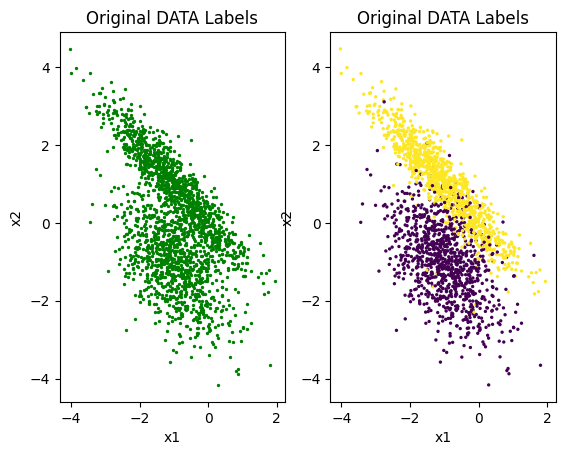

In [6]:
# Create dataset
n_points =2000
n_features=2


Data, labels=make_classification(n_samples=n_points, n_features=n_features, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=4)
Data= np.array([Data[:,0], Data[:,1],np.zeros(n_points)])
Data=np.transpose(Data)

plt.subplot(1, 2, 1)
show(title="Original DATA Labels", X=Data, label="green")
plt.subplot(1, 2, 2)
show(title="Original DATA Labels", X=Data, label=labels)

# **4.Spiliting Data into Training and Testing set**
# *by 1:3 for test and train split*


In [7]:
# Deleting the 3nd column (index 1)
Data = np.delete(Data, 2, axis=1)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(Data, labels, test_size=0.25)

# **5.Classification**
## **5.1.KNN: K Nearest Neighbour**

Accuracy: 0.94

Confusion Matrix:
[[229  20]
 [ 10 241]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       249
           1       0.92      0.96      0.94       251

    accuracy                           0.94       500
   macro avg       0.94      0.94      0.94       500
weighted avg       0.94      0.94      0.94       500



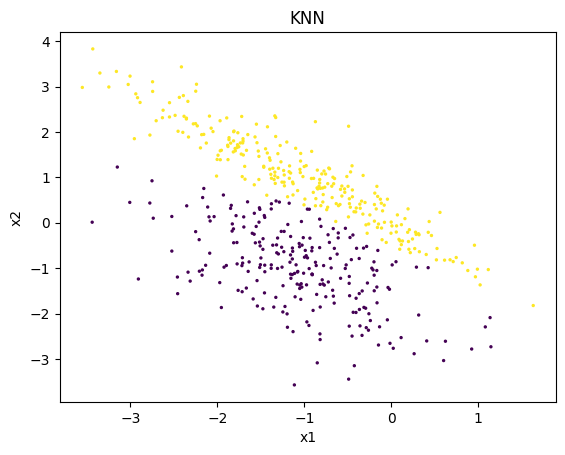

In [9]:
knn = KNeighborsClassifier(n_neighbors=16)

# Train the classifier using the training set
knn.fit(X_train, y_train)

# Use the trained classifier to predict the labels of the test set
knn_pred = knn.predict(X_test)

accuracy (knn, knn_pred,X_test,y_test)
show(title="KNN", X=X_test, label=knn_pred)

## **5.2.SVM: Support Vector Machine**

Accuracy: 0.93

Confusion Matrix:
[[223  26]
 [  9 242]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.90      0.93       249
           1       0.90      0.96      0.93       251

    accuracy                           0.93       500
   macro avg       0.93      0.93      0.93       500
weighted avg       0.93      0.93      0.93       500



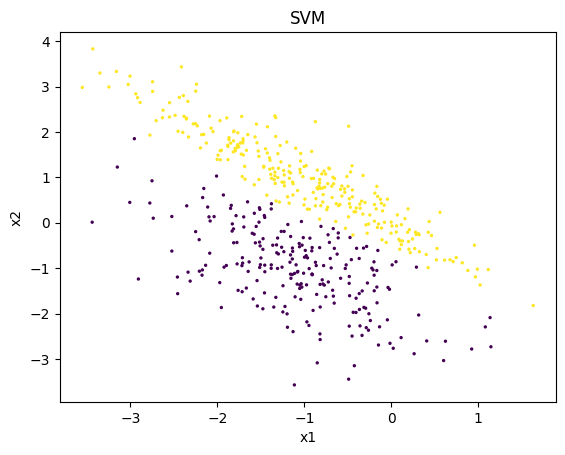

In [10]:
svm = SVC(kernel='linear', C=1,probability=True)

# Train the classifier using the training set
svm.fit(X_train, y_train)

# Use the trained classifier to predict the labels of the test set
svm_pred = svm.predict(X_test)

accuracy (svm, svm_pred,X_test,y_test)
show(title="SVM", X=X_test, label=svm_pred)

## **5.3.NN: Nureal Network (Multilayer)**

Accuracy: 0.936

Confusion Matrix:
[[226  23]
 [  9 242]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.91      0.93       249
           1       0.91      0.96      0.94       251

    accuracy                           0.94       500
   macro avg       0.94      0.94      0.94       500
weighted avg       0.94      0.94      0.94       500



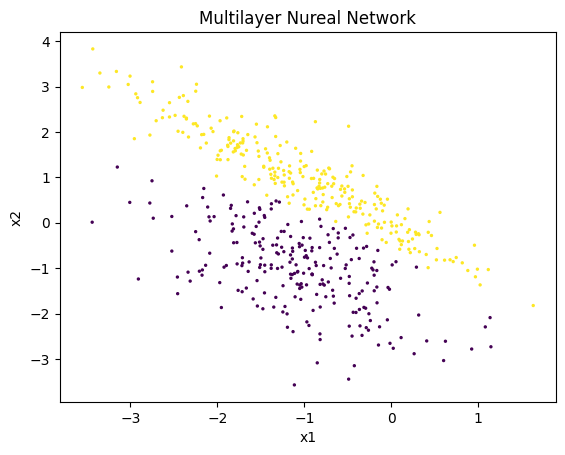

In [11]:
NN = MLPClassifier(hidden_layer_sizes=(6,), activation='relu', alpha= 0.0001 ,max_iter= 250) # can choose between identity(%94), logistic(%93.6), tanh(%94), relu(%94),
NN.fit(X_train, y_train)
NN_pred = NN.predict(X_test)

accuracy (NN, NN_pred,X_test,y_test)
show(title="Multilayer Nureal Network", X=X_test, label=NN_pred)

# **6.Clustering**
## **6.1.Hierarchical Clustering**

Accuracy :65.2


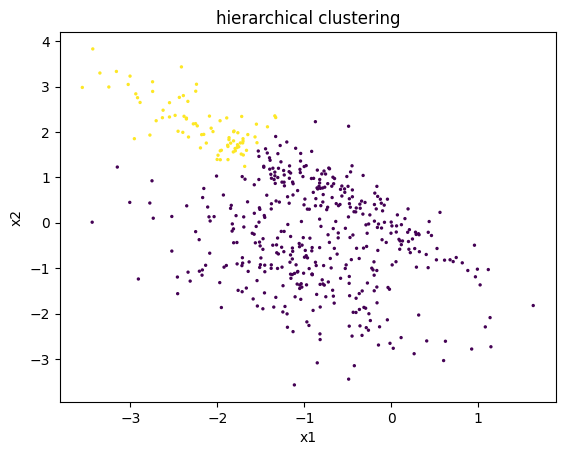

In [23]:
n_clusters = 2
hierarchical_clustering = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='complete')
hierarchical_clustering.fit(X_train, y_train)
hierarchical_clustering.labels_
HC_pred = hierarchical_clustering.fit_predict(X_test)
C_accuracy(HC_pred,y_test)
show(title="hierarchical clustering", X=X_test, label=HC_pred)

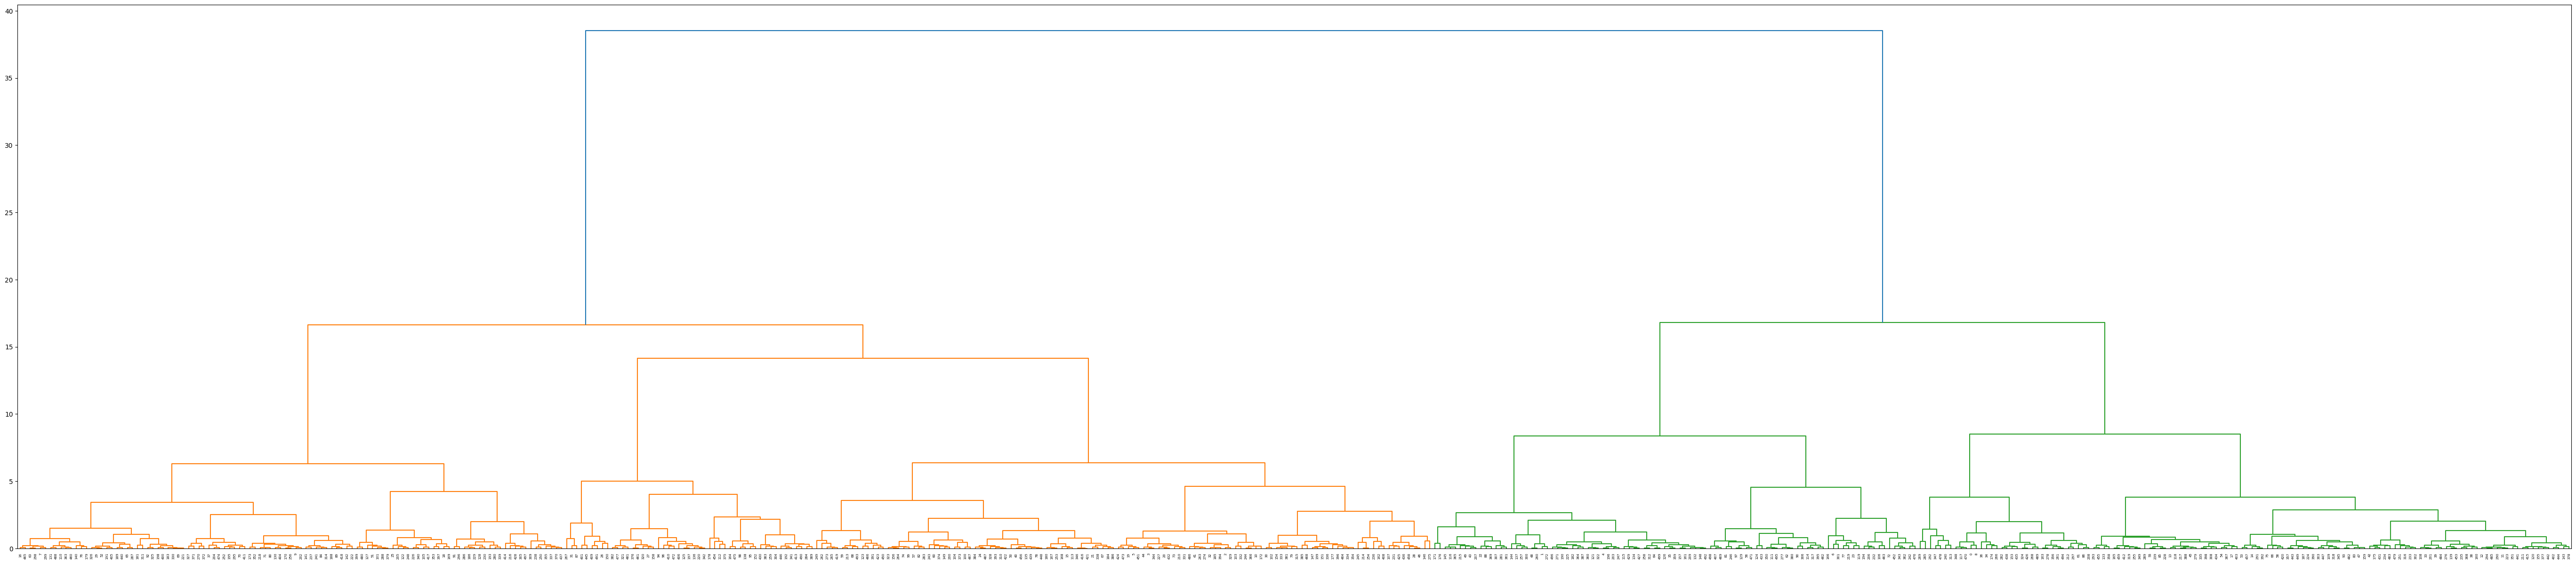

In [13]:
plt.figure(figsize=(70, 15))
linkage_data = linkage(X_test, method='ward', metric='euclidean')
dendrogram(linkage_data)
plt.show()

## **6.2.Kmeans Clustering**

Accuracy :76.2


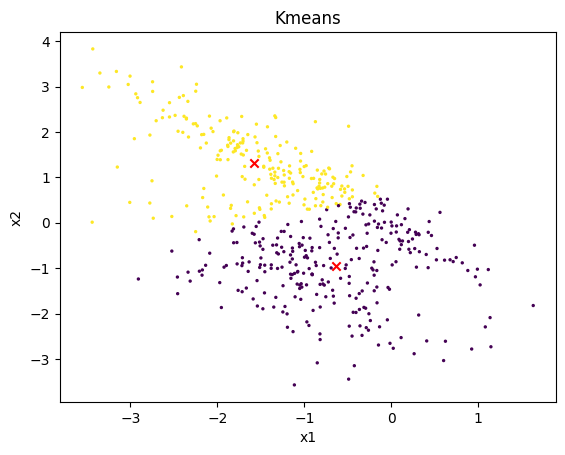

In [14]:
n_clusters = 2
kmeans_clustering = KMeans(n_clusters=n_clusters, n_init='auto', init= "k-means++")
kmeans_clustering.fit(X_train, y_train)
KM_pred = kmeans_clustering.fit_predict(X_test)
C_accuracy(KM_pred,y_test)
show(title="Kmeans", X=X_test, label=KM_pred)
plt.scatter(kmeans_clustering.cluster_centers_[:, 0], kmeans_clustering.cluster_centers_[:, 1],marker='x', color='red')

## **6.3.DBSCAN Clustering : Density Based Spatial Clustring**

Accuracy :75.6


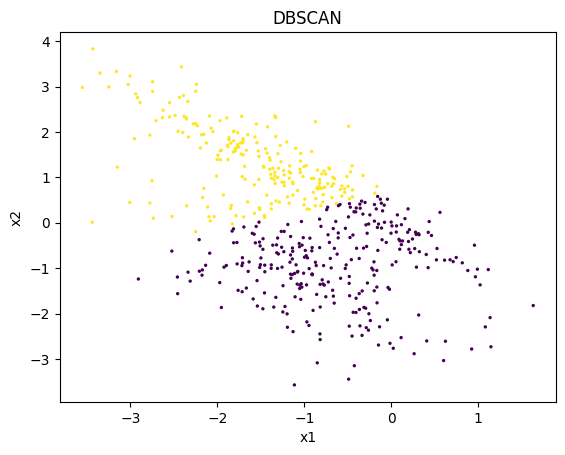

In [15]:
eps=10
min_samples=15
dbscan_clustering = DBSCAN(eps=eps, min_samples=min_samples)
dbscan_clustering.fit(X_train, y_train)
dbscan_pred = kmeans_clustering.fit_predict(X_test)
C_accuracy(dbscan_pred,y_test)
show(title="DBSCAN", X=X_test, label=dbscan_pred)